#### Clean the data

In [1]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_20231101_20241001.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Verify removal of duplicates
data.info()

# Save the cleaned data to a new CSV file
new_file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data.to_csv(new_file_path, index=False, encoding='utf-8')

print("Duplicates removed and cleaned data saved to a new CSV file successfully.")


In [3]:
import pandas as pd

# Load data with UTF-8 encoding for Chinese text
file_path = '/home/disk1/red_disk1/zhiyi/zhiyi_data/xhs_style_post_cleaned.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# Count total rows in the dataset
total_rows_count = data.shape[0]

# Display the result
print("Total rows:", total_rows_count)

# Count distinct rows by considering all columns (to ensure row uniqueness)
distinct_rows_count = data.drop_duplicates().shape[0]

# Count distinct values in the 'union_id' column
distinct_union_id_count = data['union_id'].nunique()

# Count distinct values in the 'note_id' column
distinct_note_id_count = data['note_id'].nunique()

# Display the results
print("Distinct rows:", distinct_rows_count)
print("Distinct union_id values:", distinct_union_id_count)
print("Distinct note_id values:", distinct_note_id_count)

# Count distinct values in the 'style_new' column
distinct_style_new_count = data['style_new'].nunique()

# Display the result
print("Distinct style_new values:", distinct_style_new_count)


Distinct rows: 55652253
Distinct union_id values: 32148236


#### Check styles
1. Clusters the data by style_new.
2. Counts the unique union_id and note_id values for each style.
3. Sorts the styles by the count of note_id and selects the top 10 styles.
4. Visualizes the results in a bar chart.

findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the following families were found: /usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
findfont: Generic family 'sans-serif' not found because none of the followin

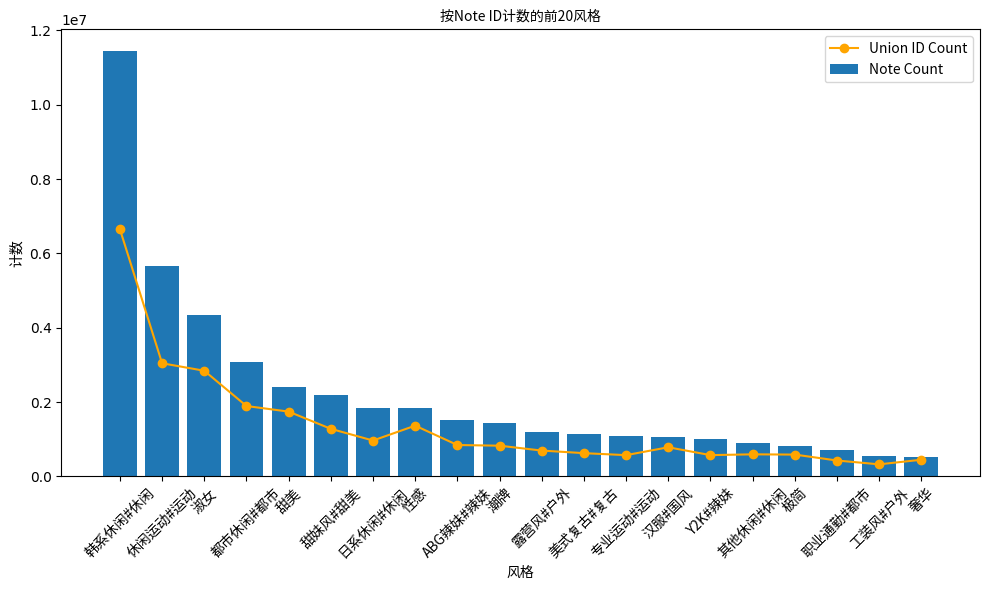

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# Set up the font properties for Chinese text
chinese_font_path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'
chinese_font = FontProperties(fname=chinese_font_path)
mpl.rcParams['font.sans-serif'] = [chinese_font_path]  # Set default font for matplotlib
mpl.rcParams['axes.unicode_minus'] = False  # Ensure minus signs display correctly

# Group by 'style_new' and count unique 'union_id' and 'note_id' for each style
style_counts = data.groupby('style_new').agg(
    unique_union_id_count=('union_id', 'nunique'),
    note_id_count=('note_id', 'count')
).reset_index()

# Sort by 'note_id_count' to get the top 20 styles
top_10_styles = style_counts.sort_values(by='note_id_count', ascending=False).head(20)

# Plotting the top 20 styles
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_styles['style_new'], top_10_styles['note_id_count'], label='Note Count')
ax.plot(top_10_styles['style_new'], top_10_styles['unique_union_id_count'], color='orange', marker='o', label='Union ID Count')

# Add labels and legend with Chinese font support
ax.set_xlabel('风格', fontproperties=chinese_font)  # 'Style' in Chinese
ax.set_ylabel('计数', fontproperties=chinese_font)  # 'Count' in Chinese
ax.set_title('按Note ID计数的前20风格', fontproperties=chinese_font)  # 'Top 20 Styles by Note ID Count' in Chinese
ax.legend(prop=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
# Display the results in a table format
top_10_styles.columns = ['Style', 'Union ID Count', 'Note ID Count']
print(top_10_styles)

         Style  Union ID Count  Note ID Count
2835   韩系休闲#休闲         6652903       11456888
294    休闲运动#运动         3045407        5672816
1823        淑女         2844417        4336113
2711   都市休闲#都市         1895395        3078393
2276        甜美         1745325        2406321
2146    甜妹风#甜美         1281870        2193410
1317   日系休闲#休闲          966857        1842870
1099        性感         1367304        1830491
0     ABG辣妹#辣妹          846238        1516466
2014        潮牌          828284        1434154
2760    露营风#户外          696957        1188889
2530   美式复古#复古          627452        1153210
178    专业运动#运动          574032        1102261
1634     汉服#国风          785735        1064052
91      Y2K#辣妹          574497         996889
425    其他休闲#休闲          595679         907946
1541        极简          588853         826082
2658   职业通勤#都市          429713         724838
915     工装风#户外          326486         548740
625         奢华          450426         521067
